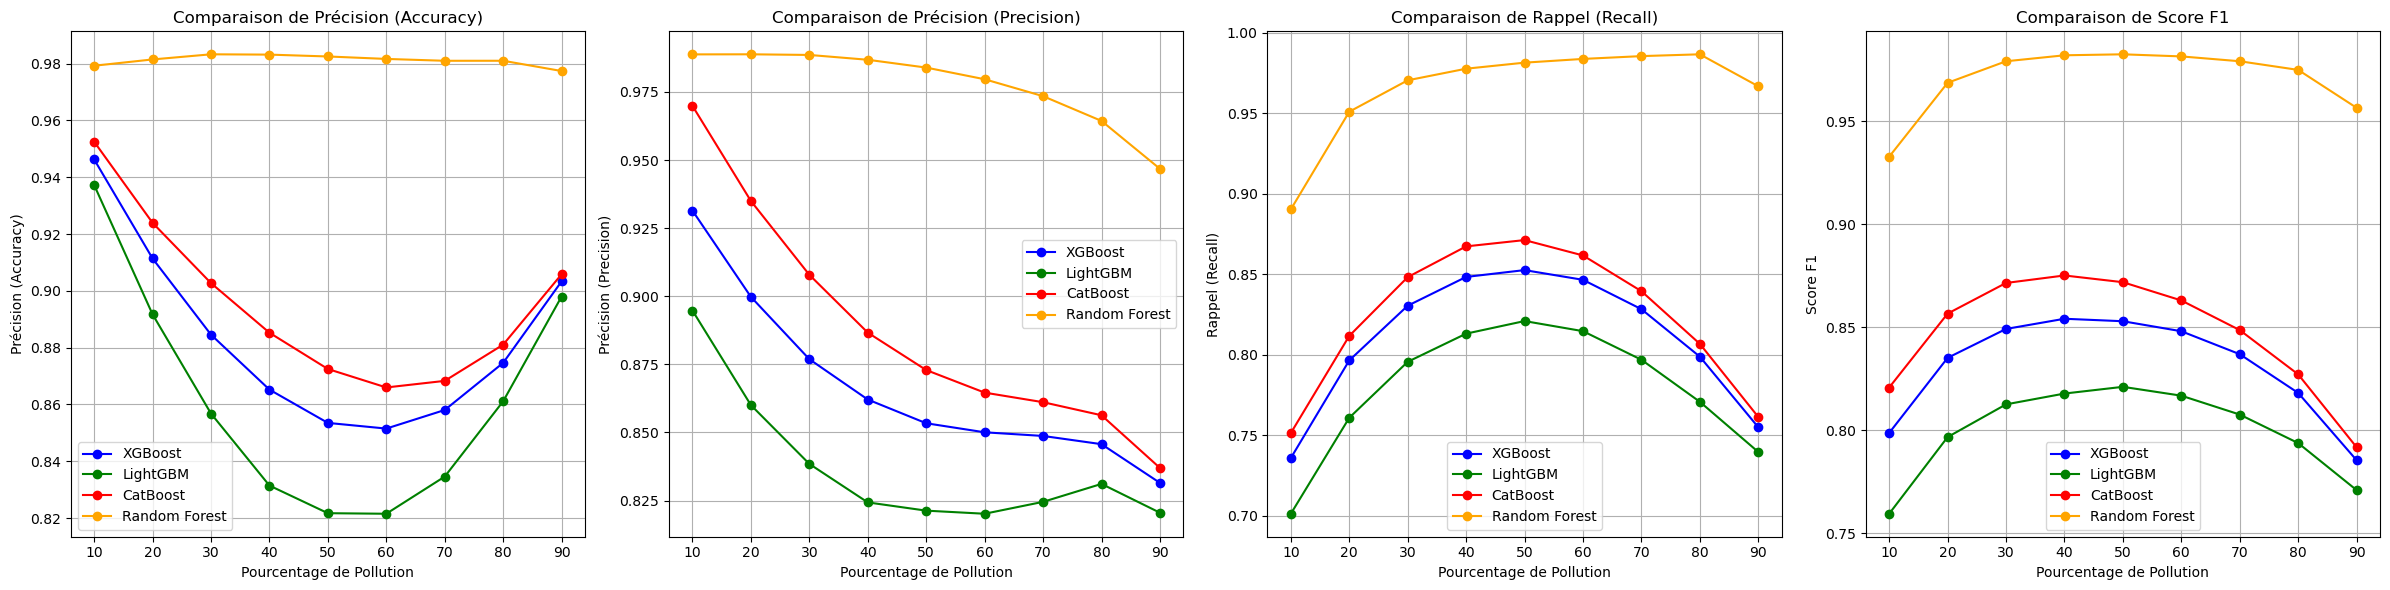

In [5]:
import json
import matplotlib.pyplot as plt

# Charger le JSON depuis le fichier
with open('../../Results/Heart Disease/Target Class Balance.json', 'r') as f:
    data = json.load(f)

# Extraire les informations nécessaires
models = data['models']

# Liste des couleurs à utiliser
colors = ['blue', 'green', 'red', 'orange']

# Associer chaque modèle à une couleur
model_colors = {model['model']: colors[i] for i, model in enumerate(models)}

# Initialiser des structures pour les données à tracer
metrics = ["accuracy", "precision", "recall", "f1_score"]
metric_labels = {
    "accuracy": "Précision (Accuracy)",
    "precision": "Précision (Precision)",
    "recall": "Rappel (Recall)",
    "f1_score": "Score F1"
}

# Créer une figure avec plusieurs sous-graphes
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

for i, metric in enumerate(metrics):
    ax = axs[i]

    for model in models:
        pollution_percentages = []
        metric_values = []

        for pollution_data in model['pollution_metrics']:
            pollution_percentages.append(pollution_data['pollution_percentage'])
            metric_values.append(pollution_data['metrics'][metric])

        ax.plot(pollution_percentages, metric_values, marker='o', label=model['model'], color=model_colors[model['model']])

    ax.set_title(f"Comparaison de {metric_labels[metric]}")
    ax.set_xlabel("Pourcentage de Pollution")
    ax.set_ylabel(metric_labels[metric])
    ax.legend()
    ax.grid(True)

# Ajuster les espaces entre les sous-graphes
plt.tight_layout()
plt.show()